<a href="https://colab.research.google.com/github/zinakhazaee/MachineLearning-SupervisedLearning_Regression/blob/main/usa_real_estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('/content/drive/MyDrive/datasets_sample/usa-real-estate-datase/realtor-data.zip.csv')

In [3]:
df.head(10)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
5,for_sale,4.0,3.0,0.46,San Sebastian,Puerto Rico,612.0,2520.0,NaN,179000.0
6,for_sale,3.0,1.0,0.20,Ciales,Puerto Rico,639.0,2040.0,NaN,50000.0
7,for_sale,3.0,2.0,0.08,Ponce,Puerto Rico,731.0,1050.0,NaN,71600.0
8,for_sale,2.0,1.0,0.09,Ponce,Puerto Rico,730.0,1092.0,NaN,100000.0
9,for_sale,5.0,3.0,7.46,Las Marias,Puerto Rico,670.0,5403.0,NaN,300000.0


In [4]:
df.shape

(1004966, 10)

In [6]:
print('df columns:', df.columns.tolist())

df columns: ['status', 'bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code', 'house_size', 'prev_sold_date', 'price']


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004966 entries, 0 to 1004965
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   status          1004966 non-null  object 
 1   bed             864435 non-null   float64
 2   bath            882116 non-null   float64
 3   acre_lot        709920 non-null   float64
 4   city            1004891 non-null  object 
 5   state           1004966 non-null  object 
 6   zip_code        1004761 non-null  float64
 7   house_size      681682 non-null   float64
 8   prev_sold_date  505867 non-null   object 
 9   price           1004895 non-null  float64
dtypes: float64(6), object(4)
memory usage: 76.7+ MB


##Data Cleaning

In [30]:
df.isnull().sum().sort_values(ascending=False)

prev_sold_date    207358
status                 0
bed                    0
bath                   0
acre_lot               0
city                   0
state                  0
zip_code               0
house_size             0
price                  0
dtype: int64

In [11]:
((df.isnull().sum()/ len(df))*100).sort_values(ascending=False)

prev_sold_date    49.663272
house_size        32.168650
acre_lot          29.358804
bed               13.983657
bath              12.224294
zip_code           0.020399
city               0.007463
price              0.007065
status             0.000000
state              0.000000
dtype: float64

In [25]:
df.dropna(subset=['acre_lot'] , inplace=True)
df.dropna(subset=['house_size'] , inplace=True)

In [26]:
df['bed'].fillna(df['bed'].mode()[0], inplace=True)
df['bath'].fillna(df['bath'].mode()[0], inplace=True)

In [27]:
df.dropna(subset=['city','zip_code'], inplace=True)

In [29]:
df['prev_sold_date'].fillna(np.NaN, inplace=True)

In [31]:
df.isnull().sum().sort_values(ascending=False)

prev_sold_date    207358
status                 0
bed                    0
bath                   0
acre_lot               0
city                   0
state                  0
zip_code               0
house_size             0
price                  0
dtype: int64

##Data Type Conversion

In [19]:
df['bath']=pd.to_numeric(df['bath'], errors='coerce')

In [20]:
df['state'] = df['state'].str.strip()

In [32]:
df['status']=df['status'].str.strip()
df['city']=df['city'].str.strip()

In [21]:
df['prev_sold_date']=pd.to_datetime(df['prev_sold_date'], errors='coerce')

In [33]:
df.dtypes

status                    object
bed                      float64
bath                     float64
acre_lot                 float64
city                      object
state                     object
zip_code                 float64
house_size               float64
prev_sold_date    datetime64[ns]
price                    float64
dtype: object

In [ ]:
#df = df[df.isna().sum(axis=1) < 2]

##Handling Outliers

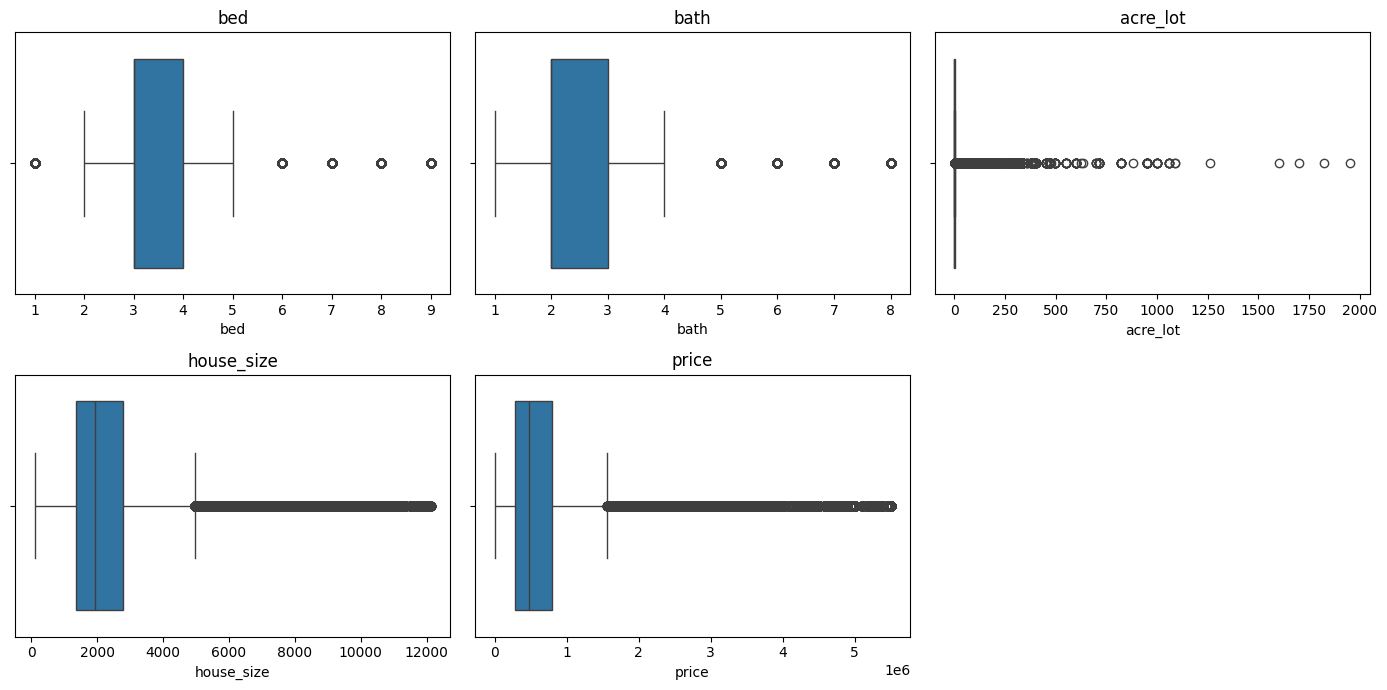

In [40]:
numeric_columns=['bed','bath','acre_lot', 'house_size','price']

plt.figure(figsize=(14,7))
for i, col in enumerate(numeric_columns):
    plt.subplot(2,3, i+1)
    sns.boxplot(data=df, x=col)
    plt.title(col)
plt.tight_layout()
plt.show()

In [38]:
outlier_threshold = 3
imputation_methods = {
    'bed': 'median',
    'bath': 'median',
    'acre_lot': 'median',
    'house_size': 'median',
    'price': 'mean'
}

for col in numeric_columns:
    if imputation_methods[col]=='mean':
        df[col]=np.where(
        np.abs(df[col]-np.mean(df[col]))>outlier_threshold*np.std(df[col]),
        np.mean(df[col]),
        df[col]
        )
    elif imputation_methods[col]=='median':
        df[col]=np.where(
        np.abs(df[col]-np.median(df[col]))>outlier_threshold*np.std(df[col]),
        np.median(df[col]),
        df[col]
        )
    else:
        pass

In [39]:
df.isnull().sum()

status                 0
bed                    0
bath                   0
acre_lot               0
city                   0
state                  0
zip_code               0
house_size             0
prev_sold_date    207358
price                  0
dtype: int64

##Exploratory Data Analysis(EDA)

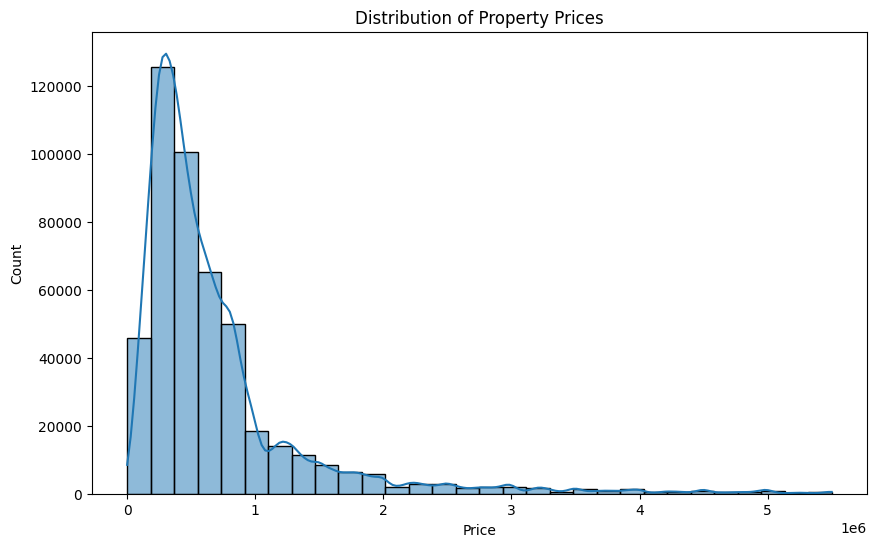

In [44]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

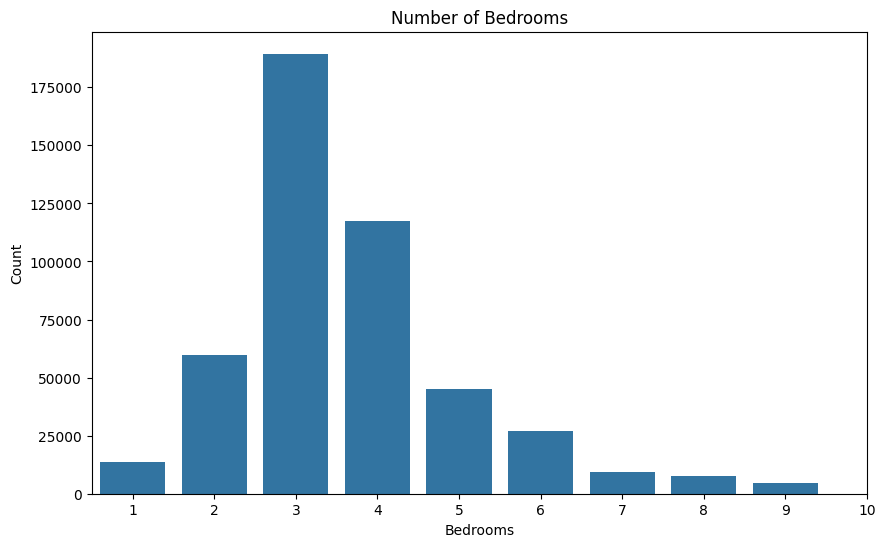

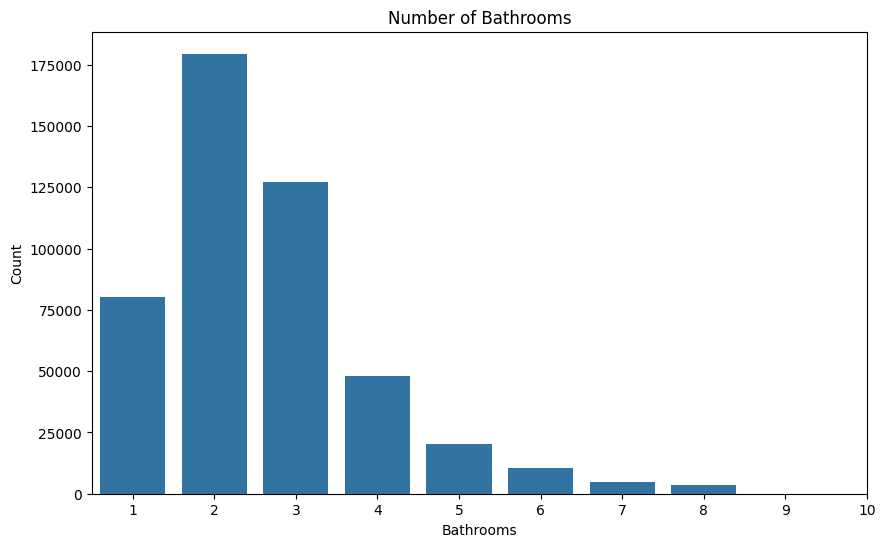

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='bed')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.xticks(ticks=np.arange(10), labels=np.arange(1,11))
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='bath')
plt.title('Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.xticks(ticks=np.arange(10), labels=np.arange(1,11))
plt.show()

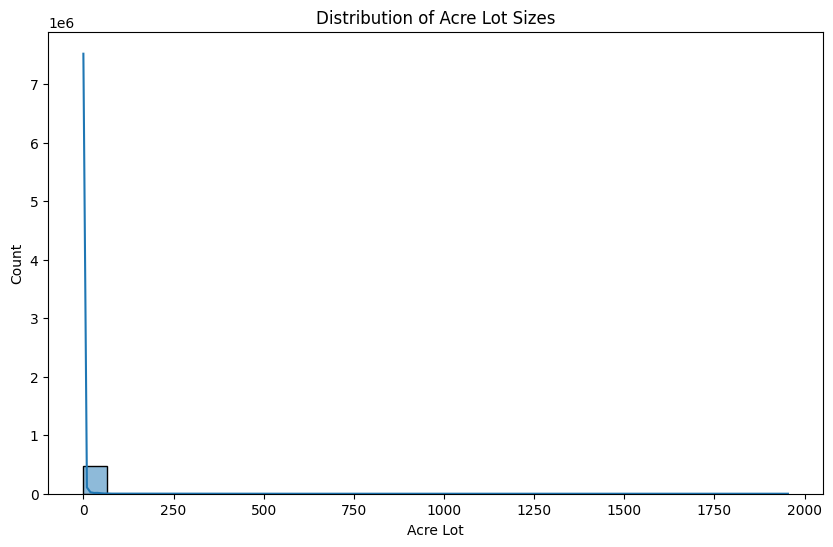

In [46]:
plt.figure(figsize=(10,6))
sns.histplot(df['acre_lot'], bins=30, kde=True)
plt.title('Distribution of Acre Lot Sizes')
plt.xlabel('Acre Lot')
plt.ylabel('Count')
plt.show()

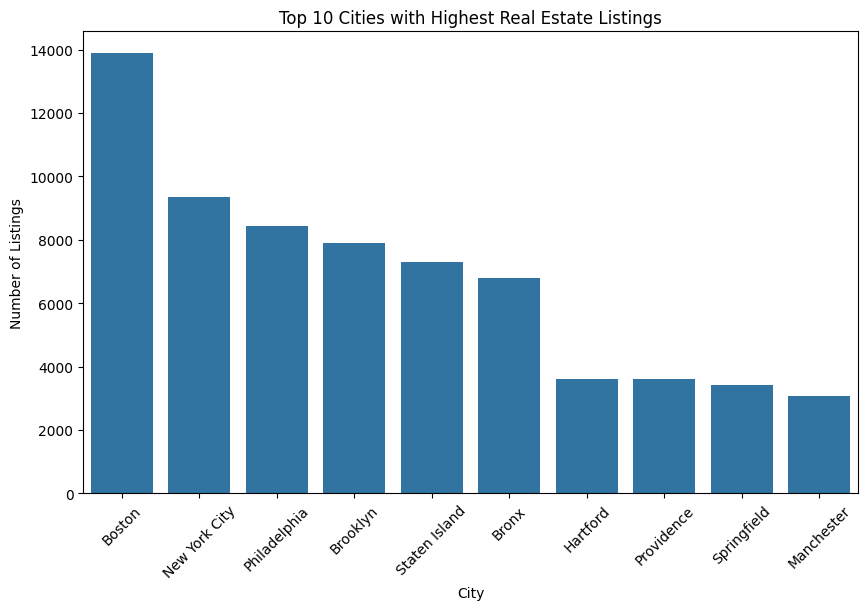

In [47]:
top_cities = df['city'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title('Top 10 Cities with Highest Real Estate Listings')
plt.xlabel('City')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

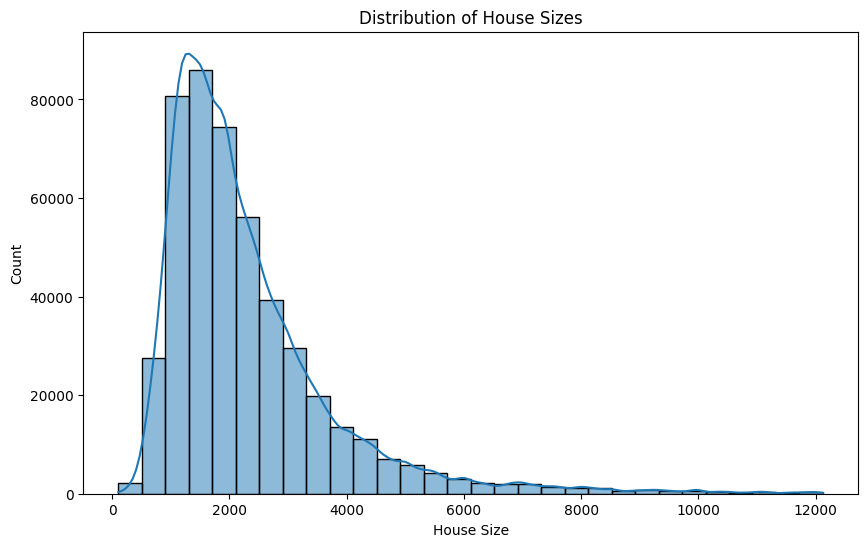

In [48]:
plt.figure(figsize=(10,6))
sns.histplot(df['house_size'], bins=30, kde=True)
plt.title('Distribution of House Sizes')
plt.xlabel('House Size')
plt.ylabel('Count')
plt.show()

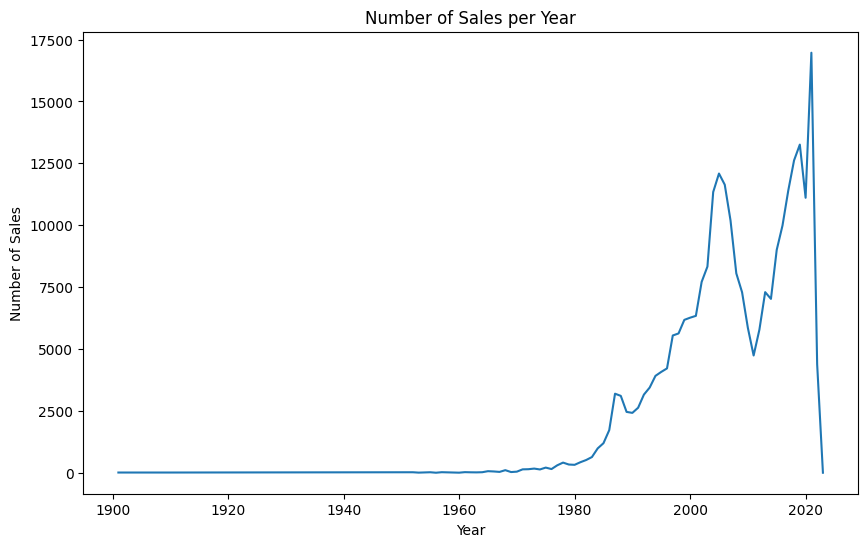

In [49]:
df['prev_sold_date'] = pd.to_datetime(df['prev_sold_date'])
df['year_sold'] = df['prev_sold_date'].dt.year
yearly_sales = df['year_sold'].value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values)
plt.title('Number of Sales per Year')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.show()

##Market Analysis
Relationship between 'price' and other variables

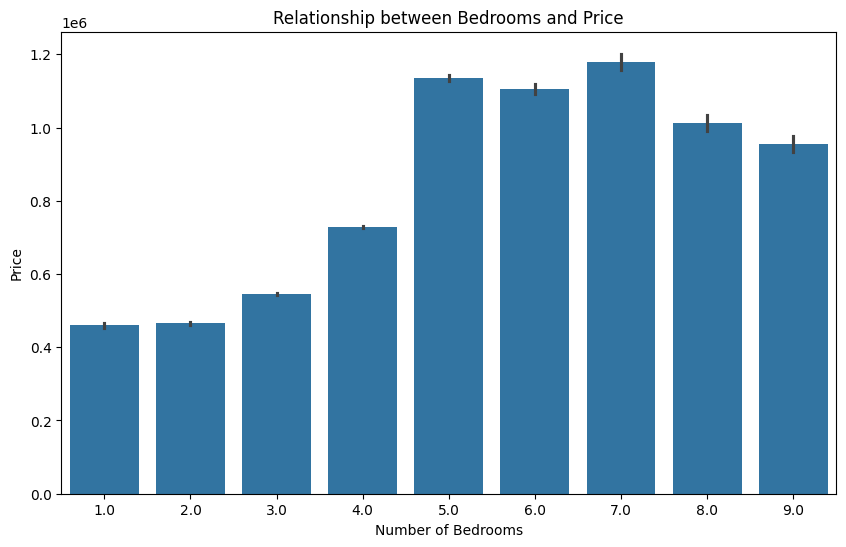

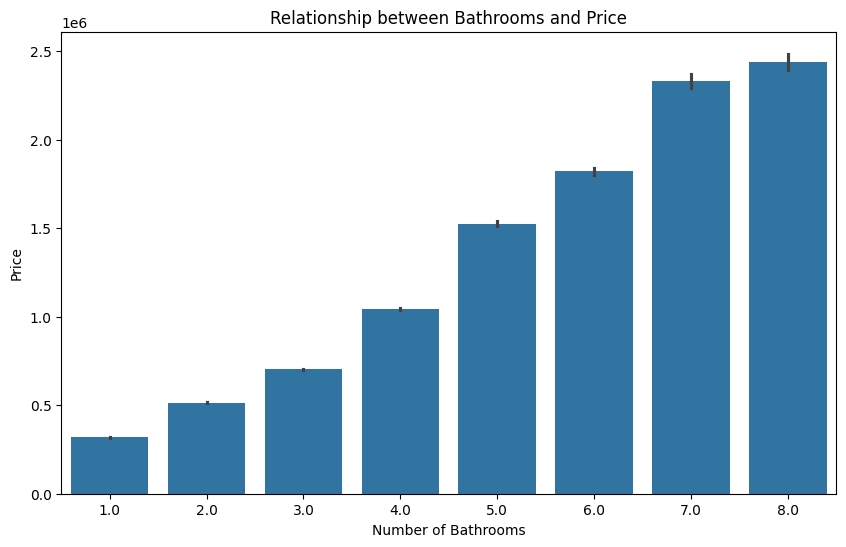

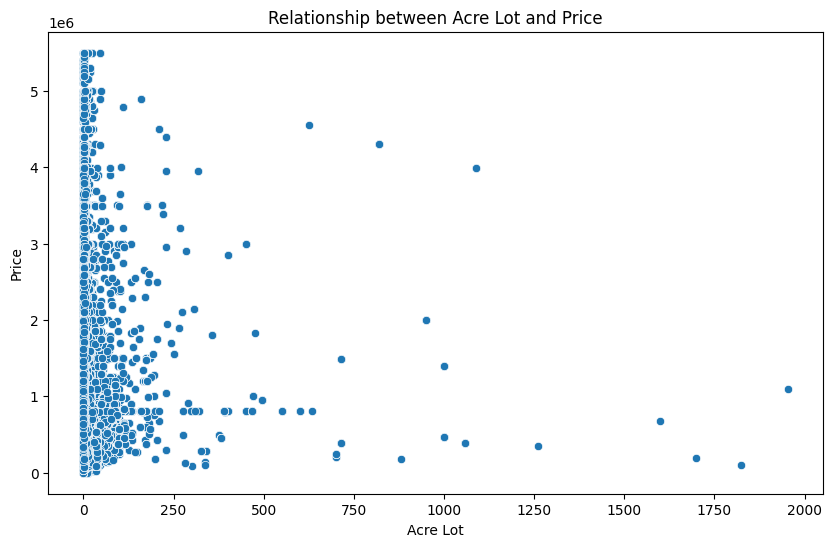

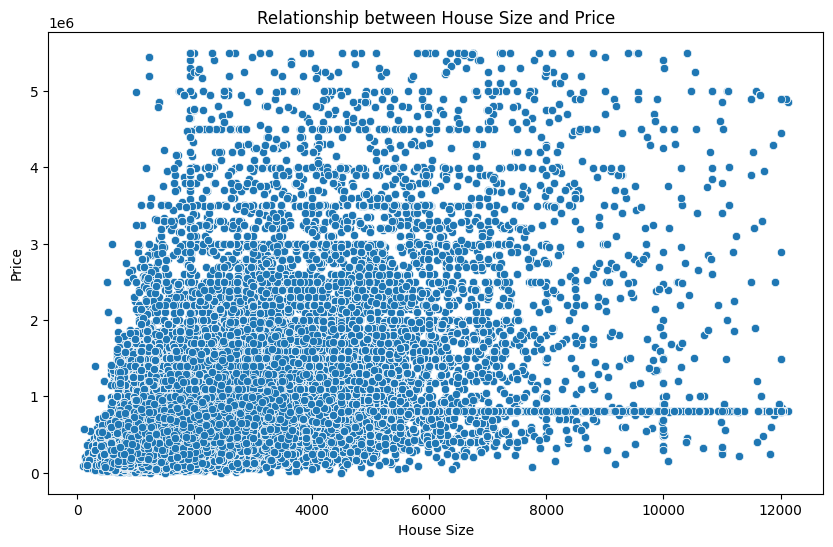

In [50]:
# Number of rooms and price
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='bed', y='price')
plt.title('Relationship between Bedrooms and Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

# Number of bedrooms and price
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='bath', y='price')
plt.title('Relationship between Bathrooms and Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()

# Acre lot and price
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='acre_lot', y='price')
plt.title('Relationship between Acre Lot and Price')
plt.xlabel('Acre Lot')
plt.ylabel('Price')
plt.show()

# House size and price
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='house_size', y='price')
plt.title('Relationship between House Size and Price')
plt.xlabel('House Size')
plt.ylabel('Price')
plt.show()

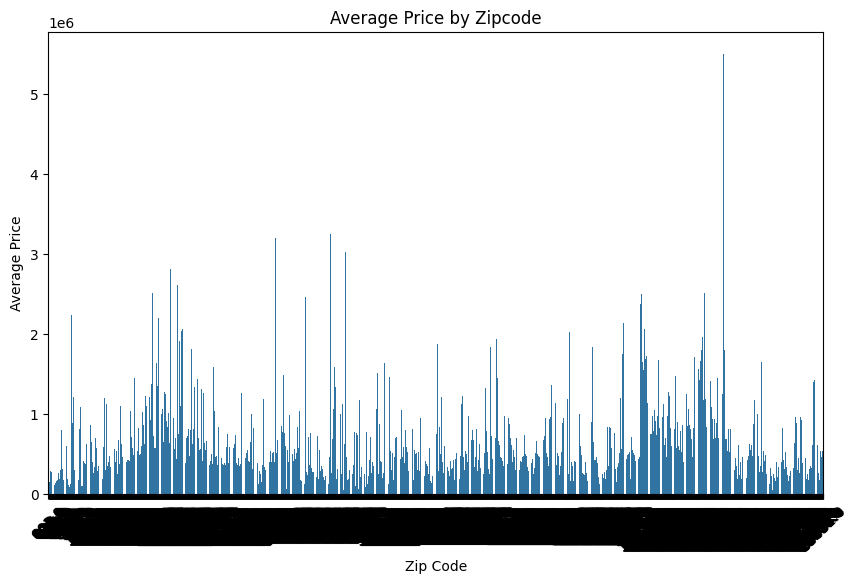

In [51]:
#Relationship Between 'price' and 'zipcode'
avg_price_by_zip = df.groupby('zip_code')['price'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=avg_price_by_zip, x='zip_code', y='price')
plt.title('Average Price by Zipcode')
plt.xlabel('Zip Code')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

In [52]:
max_avg_price = avg_price_by_zip['price'].max()
max_avg_price_zip = avg_price_by_zip.loc[avg_price_by_zip['price']==max_avg_price, 'zip_code'].values[0]

print("The highest average price is:", max_avg_price)
print("Zip code with the highest average price:", max_avg_price_zip)

The highest average price is: 5500000.0
Zip code with the highest average price: 11568.0


##Data preparation for the model

In [54]:
df.drop(columns=['prev_sold_date','zip_code','city','status','year_sold'], axis=1 , inplace=True)

In [55]:
df.isna().sum()

bed           0
bath          0
acre_lot      0
state         0
house_size    0
price         0
dtype: int64

In [56]:
df['state'].value_counts()

Massachusetts     104696
New York           87543
New Jersey         78131
Connecticut        75085
New Hampshire      25533
Rhode Island       24670
Maine              23647
Vermont            23437
Puerto Rico        15501
Pennsylvania       13939
Delaware            1742
Virgin Islands       345
West Virginia          5
Wyoming                3
Name: state, dtype: int64

In [57]:
df = df.groupby('state').filter(lambda x: len(x) >= 50)

In [58]:
df.shape

(474269, 6)

In [59]:
df['state'].unique()

array(['Puerto Rico', 'Virgin Islands', 'Massachusetts', 'Connecticut',
       'New Jersey', 'New York', 'New Hampshire', 'Vermont',
       'Rhode Island', 'Maine', 'Pennsylvania', 'Delaware'], dtype=object)

In [60]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['state_numeric'] = label_encoder.fit_transform(df['state'])
df = df.drop("state", axis=1)
df

,bed,bath,acre_lot,house_size,price,state_numeric
0,3.0,2.0,0.12,920.0,105000.0,8
1,4.0,2.0,0.08,1527.0,80000.0,8
2,2.0,1.0,0.15,748.0,67000.0,8
3,4.0,2.0,0.10,1800.0,145000.0,8
5,4.0,3.0,0.46,2520.0,179000.0,8
...,...,...,...,...,...,...
1004958,2.0,2.0,0.05,1337.0,505000.0,6
1004959,2.0,1.0,0.14,730.0,332500.0,6
1004960,3.0,2.0,0.11,1578.0,699000.0,6
1004962,3.0,2.0,0.14,1806.0,599000.0,6


In [61]:
numeric_to_state = {label: state for label, state in enumerate(label_encoder.classes_)}
# Print the mapping
print(numeric_to_state)

{0: 'Connecticut', 1: 'Delaware', 2: 'Maine', 3: 'Massachusetts', 4: 'New Hampshire', 5: 'New Jersey', 6: 'New York', 7: 'Pennsylvania', 8: 'Puerto Rico', 9: 'Rhode Island', 10: 'Vermont', 11: 'Virgin Islands'}


In [62]:
df.columns

Index(['bed', 'bath', 'acre_lot', 'house_size', 'price', 'state_numeric'], dtype='object')

In [63]:
from sklearn.preprocessing import  MinMaxScaler, OneHotEncoder,StandardScaler

In [64]:
scaler = MinMaxScaler()
df[['bed', 'bath','house_size','price','acre_lot']] = scaler.fit_transform(df[['bed', 'bath','house_size','price','acre_lot']])

In [65]:
df_encoded = pd.get_dummies(df, columns=['state_numeric'])

In [66]:
df_encoded

,bed,bath,acre_lot,house_size,price,state_numeric_0,state_numeric_1,state_numeric_2,state_numeric_3,state_numeric_4,state_numeric_5,state_numeric_6,state_numeric_7,state_numeric_8,state_numeric_9,state_numeric_10,state_numeric_11
0,0.250,0.142857,0.000061,0.067876,0.019091,0,0,0,0,0,0,0,0,1,0,0,0
1,0.375,0.142857,0.000041,0.118366,0.014545,0,0,0,0,0,0,0,0,1,0,0,0
2,0.125,0.000000,0.000077,0.053568,0.012182,0,0,0,0,0,0,0,0,1,0,0,0
3,0.375,0.142857,0.000051,0.141075,0.026364,0,0,0,0,0,0,0,0,1,0,0,0
5,0.375,0.285714,0.000235,0.200965,0.032545,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004958,0.125,0.142857,0.000026,0.102562,0.091818,0,0,0,0,0,0,1,0,0,0,0,0
1004959,0.125,0.000000,0.000072,0.052071,0.060455,0,0,0,0,0,0,1,0,0,0,0,0
1004960,0.250,0.142857,0.000056,0.122609,0.127091,0,0,0,0,0,0,1,0,0,0,0,0
1004962,0.250,0.142857,0.000072,0.141574,0.108909,0,0,0,0,0,0,1,0,0,0,0,0


In [67]:
df= df_encoded.copy()

In [68]:
X = df.drop('price', axis=1)
y = df['price']

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.2)

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
reg = LinearRegression()

In [73]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [74]:
reg.score(xtest,ytest)

0.412543781637689

In [75]:
reg.coef_

array([-0.05812258,  0.22440236,  0.69547777,  0.35746158, -0.01619253,
       -0.03531699, -0.00747206,  0.04183084, -0.01017661, -0.00959384,
        0.05922009, -0.01865639, -0.03566688, -0.01059544, -0.02502772,
        0.06764754])